### stopwords

In [35]:
import nltk
import spacy
nltk.download('stopwords')
nltk.download('punkt')
import matplotlib.pyplot as plt
eng_stop_words=nltk.corpus.stopwords.words('english')

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
print(f"Total number of stopwords are : {len(eng_stop_words)}")

Total number of stopwords are : 179


In [6]:
eng_stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [8]:
text=''' Natural language processing (NLP) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned 
with the interactions between computers and human language, in particular how to program computers to process 
and analyze large amounts of natural language data. The goal is a computer capable of "understanding" the contents of documents, 
including the contextual nuances of the language within them.
The technology can then accurately extract information and insights contained in the
documents as well as categorize and organize the documents themselves. '''


### tokenizing the text with nltk

doc=nltk.word_tokenize(text)

In [11]:
lst=[]
for token in doc:
  if token not in eng_stop_words:
    lst.append(token)

new_doc=" ".join(lst)
new_doc

"Natural language processing ( NLP ) interdisciplinary subfield linguistics , computer science , artificial intelligence concerned interactions computers human language , particular program computers process analyze large amounts natural language data . The goal computer capable `` understanding '' contents documents , including contextual nuances language within . The technology accurately extract information insights contained documents well categorize organize documents ."

### creating wordcloud

In [14]:
!pip install WordCloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
from wordcloud import WordCloud

demo_cloud=WordCloud(stopwords=eng_stop_words).generate(new_doc)

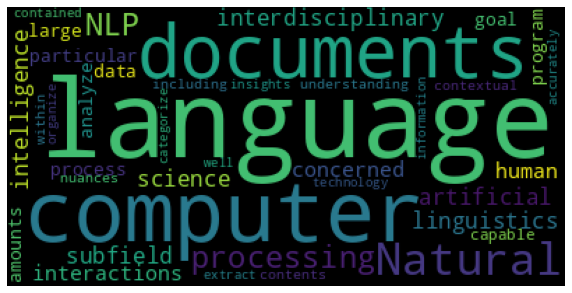

In [26]:
plt.figure(figsize=(10,7))
plt.imshow(demo_cloud)
plt.axis('off')
plt.show()

### Stemming & Lemmatizing

NLTK has support for both stemming and lemmatization , but spacy supports only lemmatization

In [31]:
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

ps=PorterStemmer()
lm=WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [34]:
words=['cathing','catched','catchy','catch','eaten','eating','ate']

print("Root word || Stemming  || Lemmatization")
for word in words:
  print(f"{word} |||  {ps.stem(word)} ||| {lm.lemmatize(word,'v')}")

Root word || Stemming  || Lemmatization
cathing |||  cath ||| cathing
catched |||  catch ||| catch
catchy |||  catchi ||| catchy
catch |||  catch ||| catch
eaten |||  eaten ||| eat
eating |||  eat ||| eat
ate |||  ate ||| eat


Using Lemmatized words for wordcloud

In [37]:
nlp=spacy.load('en_core_web_sm')
document=nlp(text)
lemma_lst=[]
for i in document:
  lemma_lst.append(i.lemma_)


word_lst=[]
for i in lemma_lst:
  if i not in eng_stop_words:
    word_lst.append(i)
string=" ".join(word_lst)


lemma_cloud=WordCloud(stopwords=eng_stop_words).generate(string)


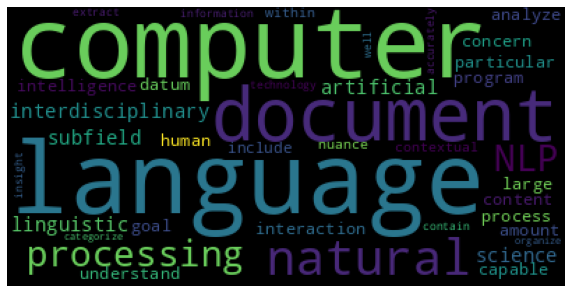

In [38]:
plt.figure(figsize=(10,7))
plt.imshow(lemma_cloud)
plt.axis('off')
plt.show()

### concatenaing the two word *cloud*

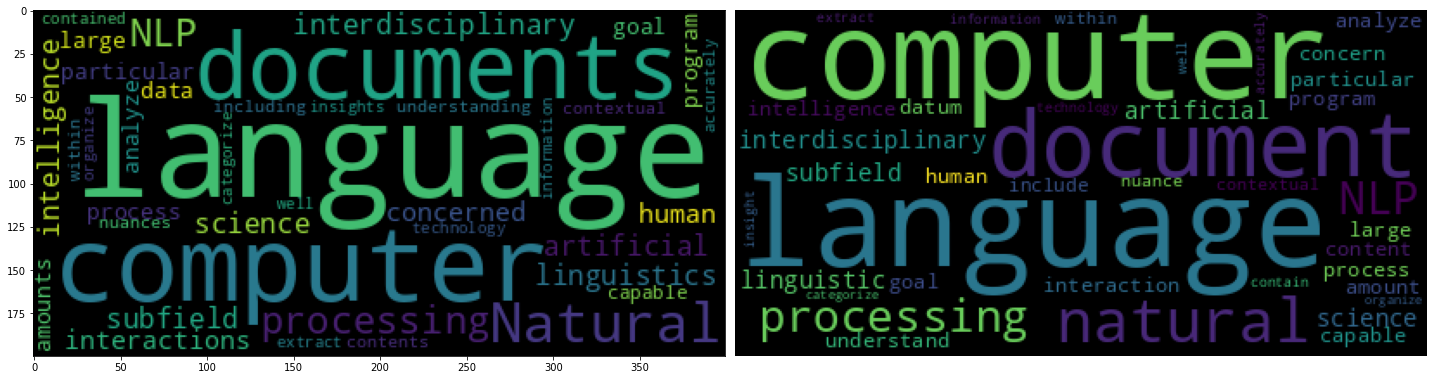

In [41]:
plt.figure(1, figsize=(20,14))
plt.subplot(121)
plt.imshow(demo_cloud)
plt.subplot(122)
plt.imshow(lemma_cloud)
plt.axis('off')
plt.tight_layout(pad=1)
plt.show()